In [6]:
# bibliotecas úteis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# importando dados
dataset = pd.read_csv("data/dados.csv")

# mostrando primeiros dados e suas colunas
display(dataset.head())

# mostrando colunas
display(dataset.columns)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [8]:
# retornar os dados estatisticos da base (apenas numericos)
dataset.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000
mean,39.889296,255.085028,2.526842,962.227743,0.192064,0.079093,93.584553,-40.578226,3.605769,5165.642314
std,10.282229,256.265737,2.556995,187.599866,0.551960,1.559126,0.581162,4.594237,1.739625,74.384632
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,101.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.876000,-41.800000,4.857000,5191.000000
75%,47.000000,316.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
# obtendo o atributo (target).
classes = dataset.duration

# excluindo os atributos "home_name", "away_name", "home_score", "away_home" e "final_result"
del_columns = ['home_name', 'away_name', 'away_score', 'home_score', 'final_result', 'time']
dataset = dataset.drop(del_columns, axis=1)
# Imprimir colunas do novo dataset
print(dataset.columns)

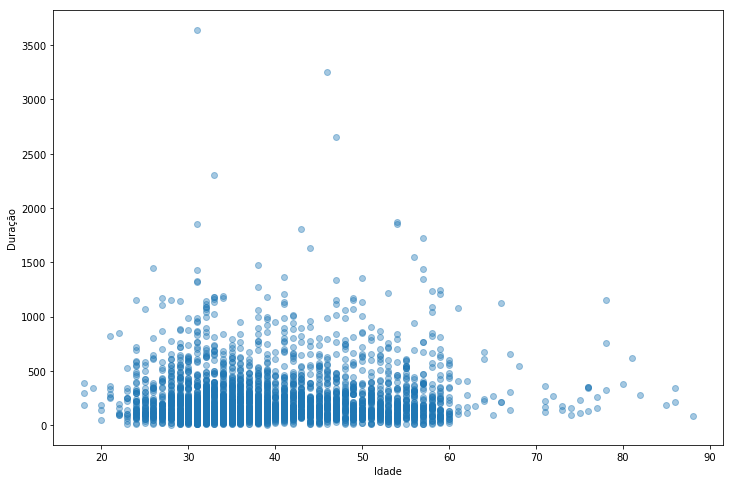

In [12]:
# verificando a coluna idade
plt.figure(figsize=(12,8))
plt.scatter(dataset['age'],dataset['duration'],alpha=0.4)
plt.xlabel('Idade')
plt.ylabel('Duração')
plt.show()